In [6]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'Jan')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'Jan')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [8]:
def names(Name,title,size,w):
    namevalues = list(map(str, data[Name].value_counts().keys().tolist()))
    namecounts = list(map(int, data[Name].value_counts().tolist()))
    crimename = pd.DataFrame({'Type':namevalues,'repeat':namecounts})
    namebar = (crimename).sort_values(['repeat'])
    ax = namebar.plot(x = 'Type', y = 'repeat', kind = 'barh', figsize = size,title = title,legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))

# Count of crime based on name

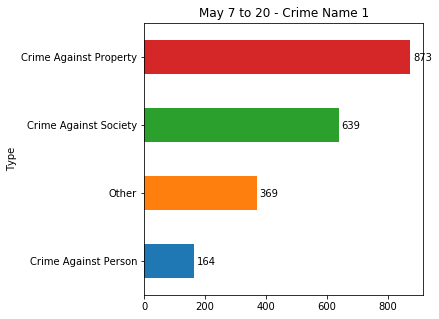

In [9]:
names("Crime Name1", "May 7 to 20 - Crime Name 1",(5,5),10)

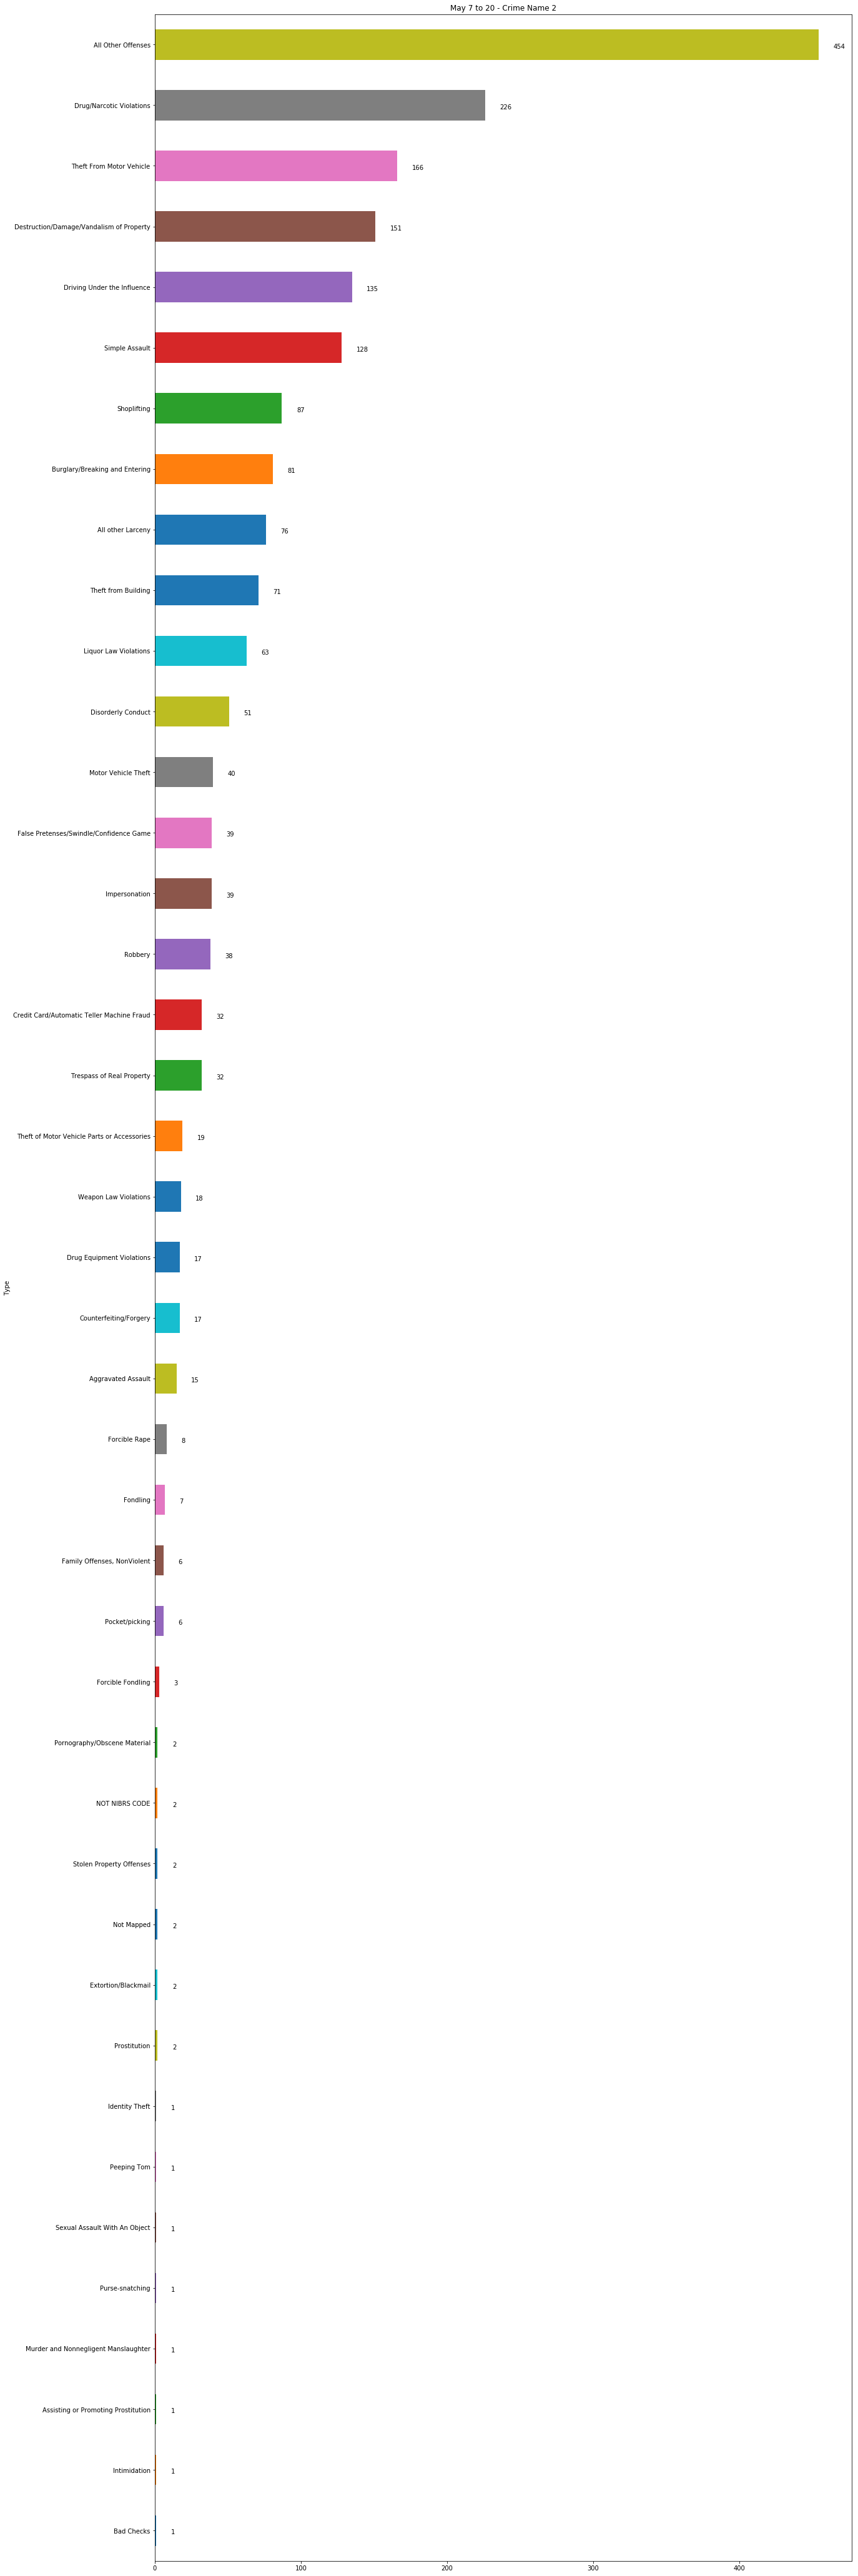

In [10]:
names("Crime Name2", "May 7 to 20 - Crime Name 2",(20,75),10)

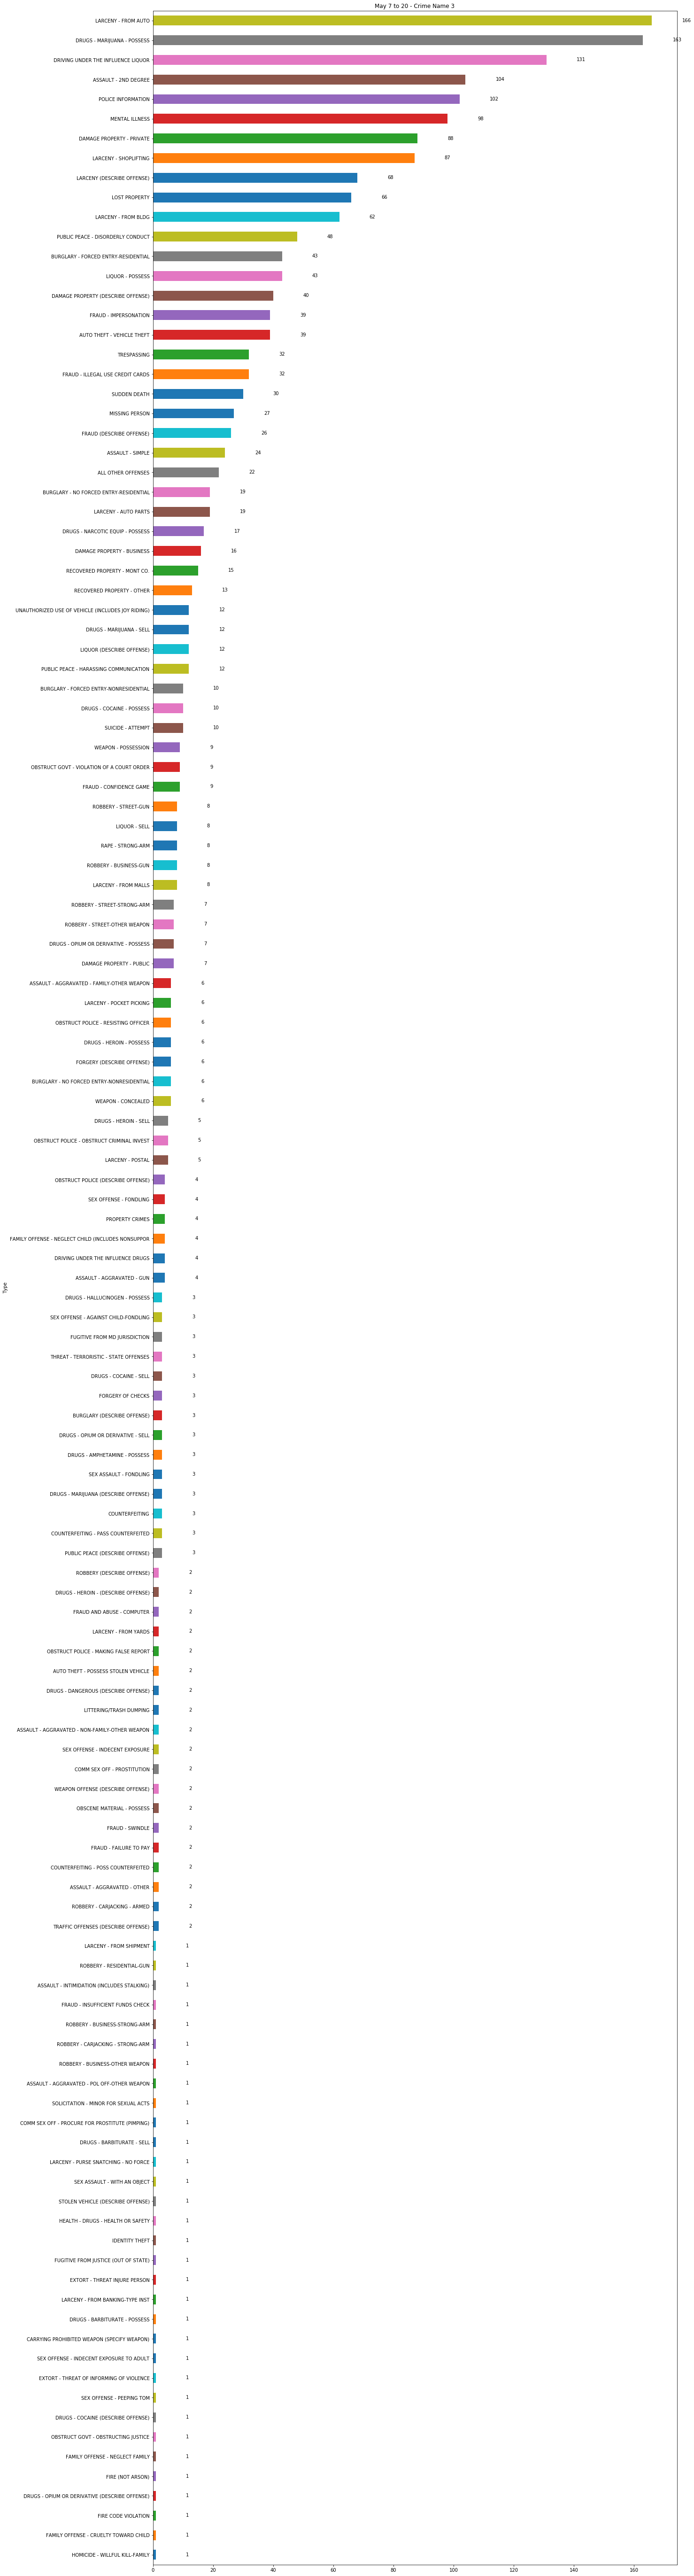

In [11]:
names("Crime Name3", "May 7 to 20 - Crime Name 3",(20,100),10)

In [12]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

# Count of crime based on weekday

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

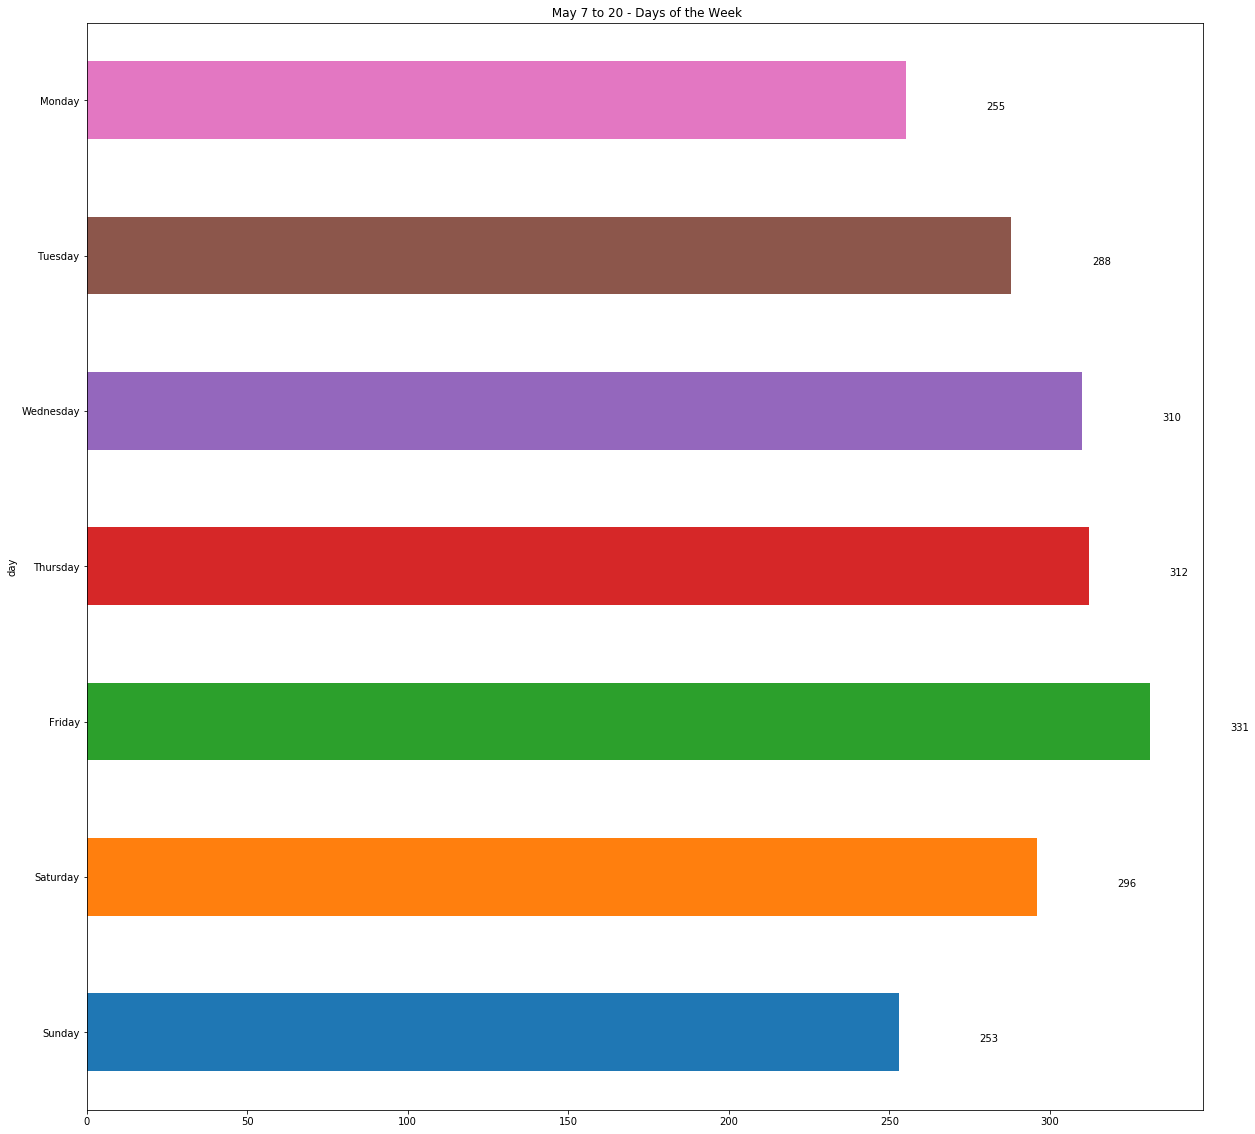

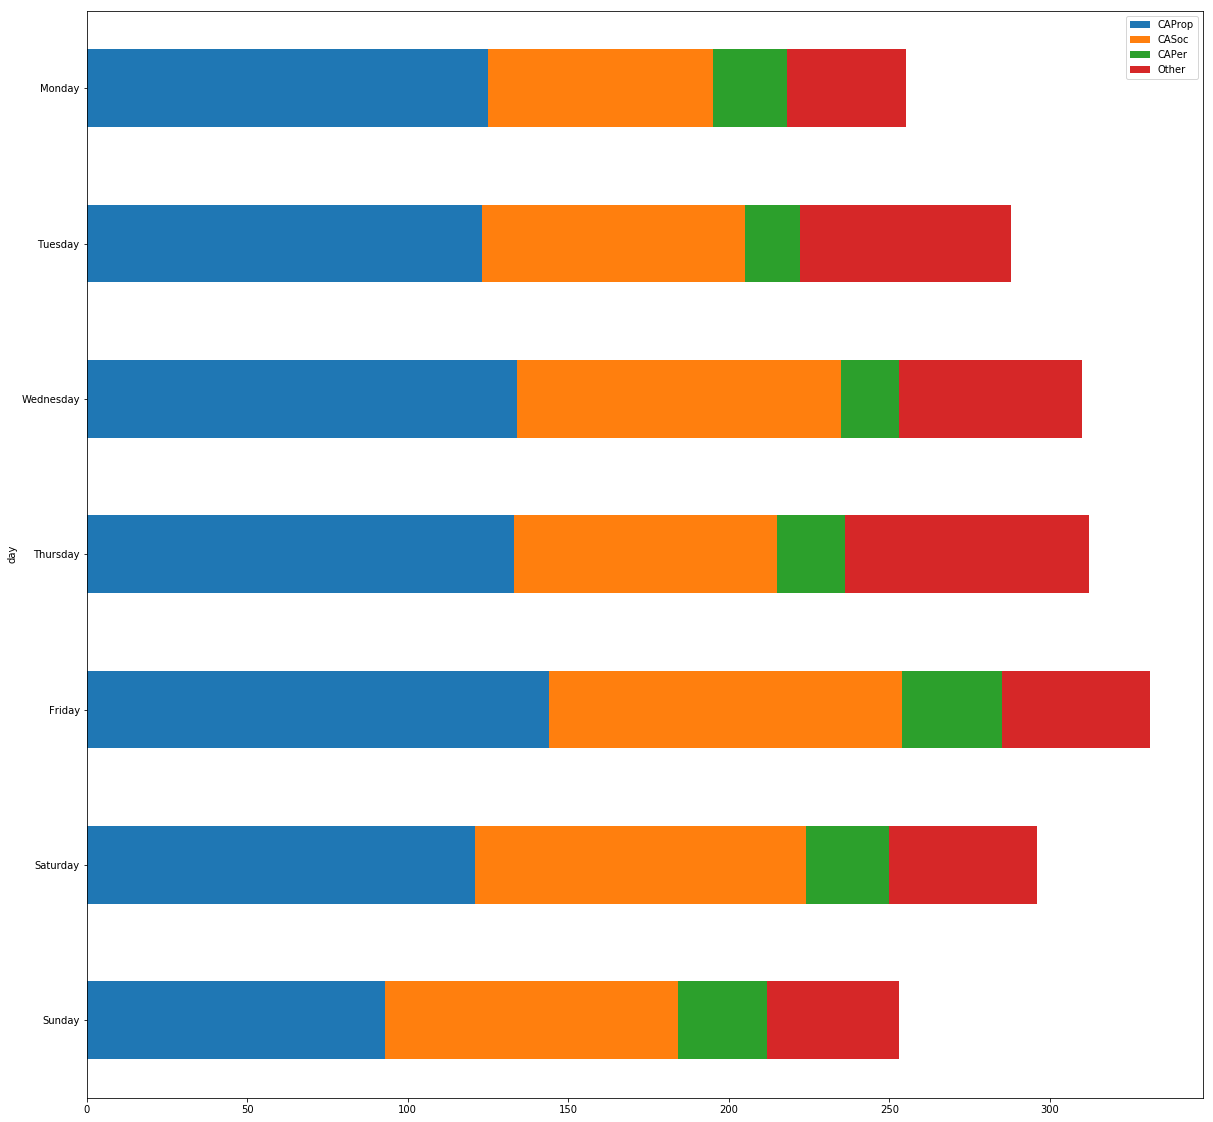

In [13]:
weekandcount(data,25," May 7 to 20 - Days of the Week")

In [14]:
def dayandcount(data,w):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    ughh = []
    ughhh = []
    #datevalues.append("03-17")
    #datecounts.append(0)
    date = pd.DataFrame({'Date':datevalues,'count':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date'])
    bruh = [0]*14
    bruh1 = [0]*14
    bruh2 = [0]*14
    bruh3 = [0]*14
    ugh = []
    datevalues.sort()
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh1[datevalues.index(row['Start Date'])] +=1
            #print(row['Start Date'],datevalues.index(row['Start Date']),row["Crime Name1"])
            #print(bruh1)
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh2[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh3[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[datevalues.index(row['Start Date'])] +=1
    date["Crime Against Property"] = bruh
    date["Crime Against Society"] = bruh1
    date["Crime Against Person"] = bruh2
    date["Other"] = bruh3
    #date = date.drop([0],axis = 0)
    #date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'count', kind = 'bar', figsize = (20,20),title = "May 7 to 20 - Daily", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_y()))
    ugh = date["count"]
    date = date.drop(["count"],axis = 1)
    ax = date.plot.bar(figsize = (20,20),stacked = True,x = 'Date')
    date["count"] = ugh
    return date, datevalues

# Crime by Date

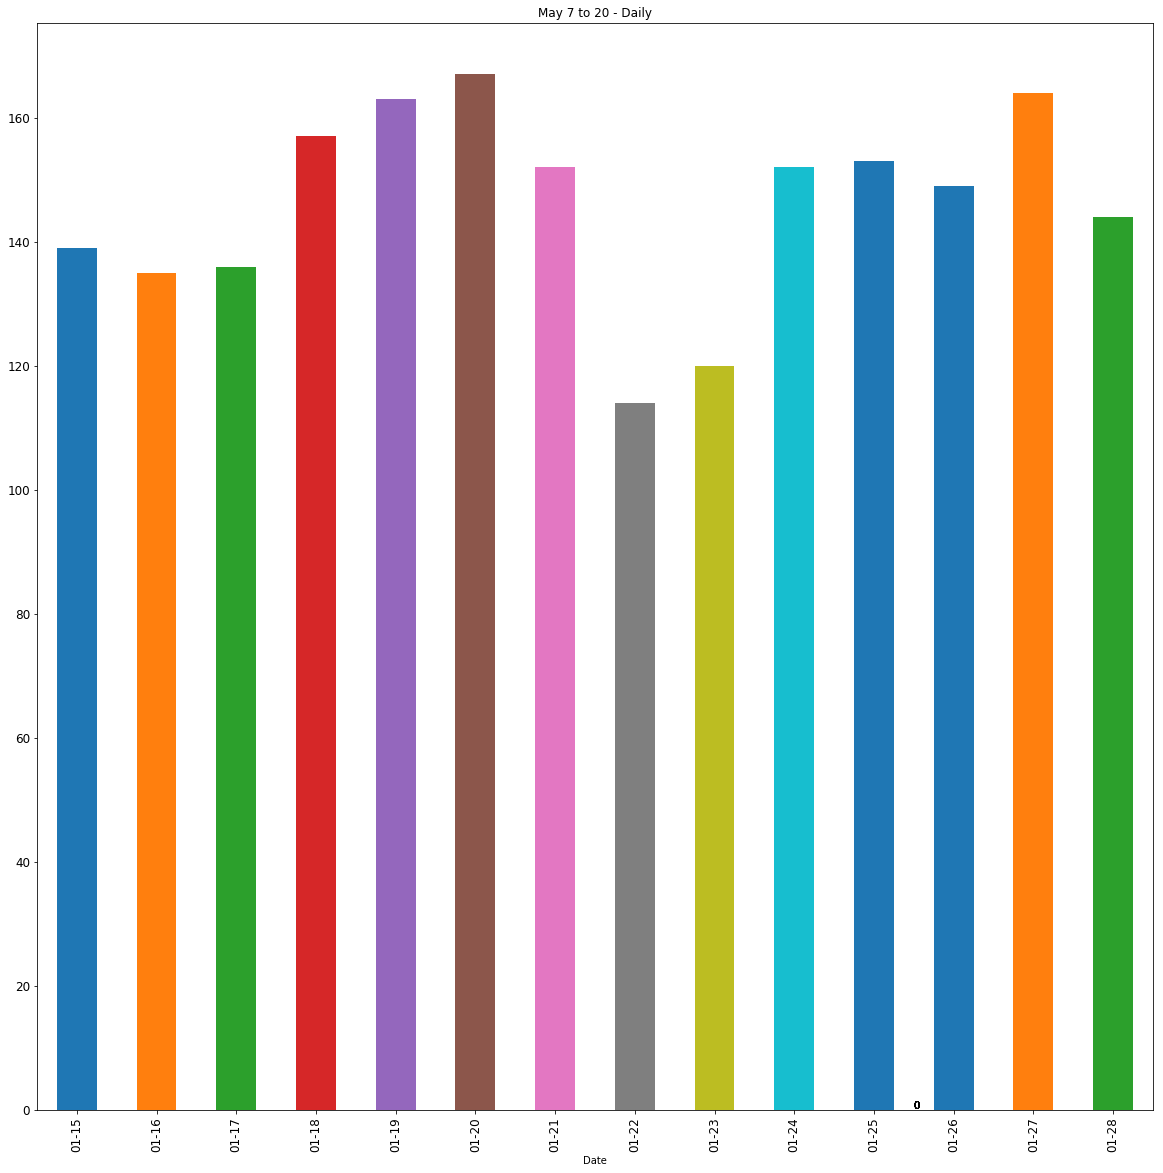

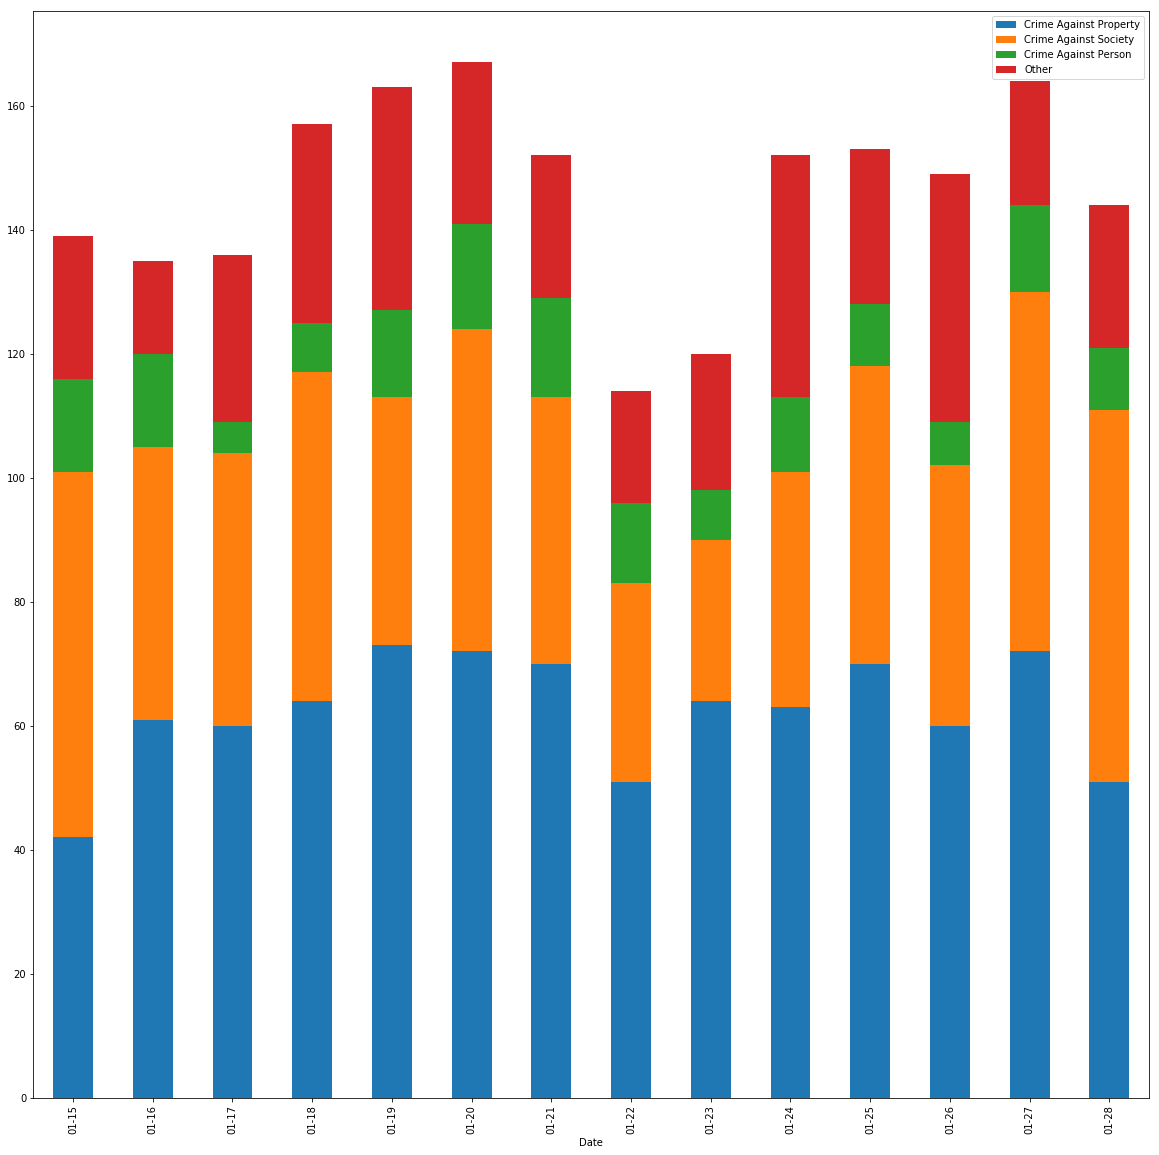

In [15]:
date,datevalues = dayandcount(data,10)

# Crime by hour

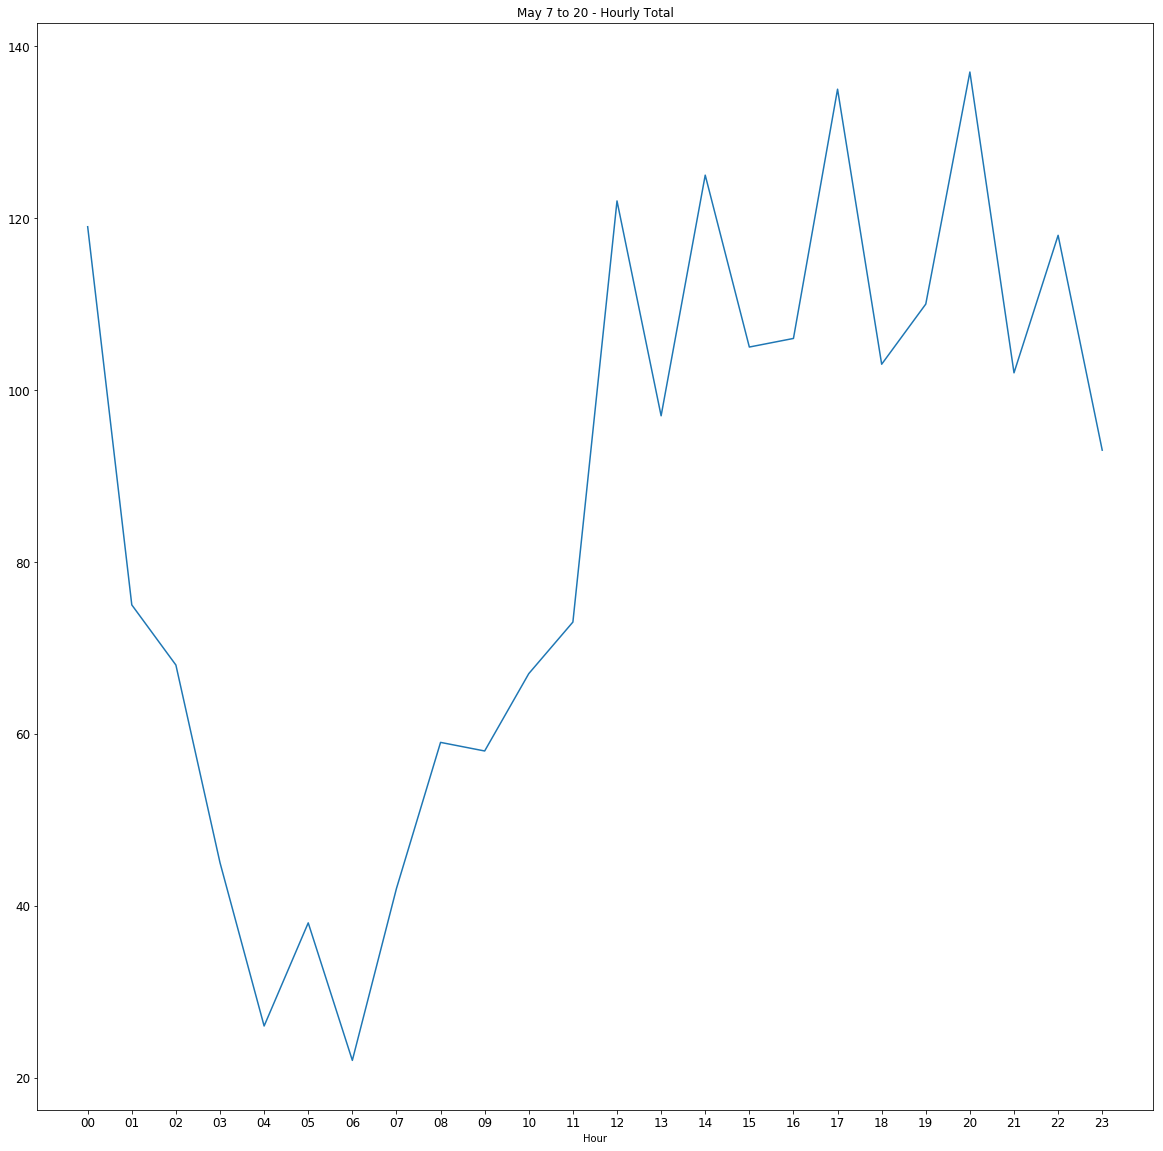

In [16]:
hourvalues = list(map(str, data['Start Time'].value_counts().keys().tolist()))
hourcounts = list(map(int, data['Start Time'].value_counts().tolist()))
ughh = []
ughhh = []
hour = pd.DataFrame({'Hour':hourvalues,'count':hourcounts})
hourbar = hour.sort_values(['Hour'])
#hourbar = hourbar.drop([24],axis = 0)
ax = hourbar.plot(x = 'Hour', y = 'count', kind = 'line', figsize = (20,20),title = 'May 7 to 20 - Hourly Total', legend = False, fontsize = 12,xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [17]:
ugh = [0]*(336)
ughh = []
i = -1
j = 0
data = data.sort_values("Start Date/Time")
for d in datevalues:
    i = datevalues.index(d)
    for index,row in data.iterrows():
        if d == row["Start Date"]:
            j = int(row["Start Time"])
            ugh[(14*j)+i] += 1
dateandtime = []
for i in range (0, 24):
    for d in datevalues:
        dateandtime.append(d + " " +str(i))
print(dateandtime)
time0 = dateandtime[0:14]
time1 = dateandtime[14:28]
time2 = dateandtime[28:42]
time3 = dateandtime[42:56]
time4 = dateandtime[56:70]
time5 = dateandtime[70:84]
time6 = dateandtime[84:98]
time7 = dateandtime[98:112]
time8 = dateandtime[112:126]
time9 = dateandtime[126:140]
time10 = dateandtime[140:154]
time11 = dateandtime[154:168]
time12 = dateandtime[168:182]
time13 = dateandtime[182:196]
time14 = dateandtime[196:210]
time15 = dateandtime[210:224]
time16 = dateandtime[224:238]
time17 = dateandtime[238:252]
time18 = dateandtime[252:266]
time19 = dateandtime[266:280]
time20 = dateandtime[280:294]
time21 = dateandtime[294:308]
time22 = dateandtime[308:322]
time23 = dateandtime[322:336]
dateandtime = []
for i in range(0,14):
    dateandtime.append(time0[i])
    dateandtime.append(time1[i])
    dateandtime.append(time2[i])
    dateandtime.append(time3[i])
    dateandtime.append(time4[i])
    dateandtime.append(time5[i])
    dateandtime.append(time6[i])
    dateandtime.append(time7[i])
    dateandtime.append(time8[i])
    dateandtime.append(time9[i])
    dateandtime.append(time10[i])
    dateandtime.append(time11[i])
    dateandtime.append(time12[i])
    dateandtime.append(time13[i])
    dateandtime.append(time14[i])
    dateandtime.append(time15[i])
    dateandtime.append(time16[i])
    dateandtime.append(time17[i])
    dateandtime.append(time18[i])
    dateandtime.append(time19[i])
    dateandtime.append(time20[i])
    dateandtime.append(time21[i])
    dateandtime.append(time22[i])
    dateandtime.append(time23[i])
print(dateandtime)
time_0 = ugh[0:14]
time_1 = ugh[14:28]
time_2 = ugh[28:42]
time_3 = ugh[42:56]
time_4 = ugh[56:70]
time_5 = ugh[70:84]
time_6 = ugh[84:98]
time_7 = ugh[98:112]
time_8 = ugh[112:126]
time_9 = ugh[126:140]
time_10 = ugh[140:154]
time_11 = ugh[154:168]
time_12 = ugh[168:182]
time_13 = ugh[182:196]
time_14 = ugh[196:210]
time_15 = ugh[210:224]
time_16 = ugh[224:238]
time_17 = ugh[238:252]
time_18 = ugh[252:266]
time_19 = ugh[266:280]
time_20 = ugh[280:294]
time_21 = ugh[294:308]
time_22 = ugh[308:322]
time_23 = ugh[322:336]
ugh = []
for i in range(0,14):
    ugh.append(time_0[i])
    ugh.append(time_1[i])
    ugh.append(time_2[i])
    ugh.append(time_3[i])
    ugh.append(time_4[i])
    ugh.append(time_5[i])
    ugh.append(time_6[i])
    ugh.append(time_7[i])
    ugh.append(time_8[i])
    ugh.append(time_9[i])
    ugh.append(time_10[i])
    ugh.append(time_11[i])
    ugh.append(time_12[i])
    ugh.append(time_13[i])
    ugh.append(time_14[i])
    ugh.append(time_15[i])
    ugh.append(time_16[i])
    ugh.append(time_17[i])
    ugh.append(time_18[i])
    ugh.append(time_19[i])
    ugh.append(time_20[i])
    ugh.append(time_21[i])
    ugh.append(time_22[i])
    ugh.append(time_23[i])
print(ugh)

['01-15 0', '01-16 0', '01-17 0', '01-18 0', '01-19 0', '01-20 0', '01-21 0', '01-22 0', '01-23 0', '01-24 0', '01-25 0', '01-26 0', '01-27 0', '01-28 0', '01-15 1', '01-16 1', '01-17 1', '01-18 1', '01-19 1', '01-20 1', '01-21 1', '01-22 1', '01-23 1', '01-24 1', '01-25 1', '01-26 1', '01-27 1', '01-28 1', '01-15 2', '01-16 2', '01-17 2', '01-18 2', '01-19 2', '01-20 2', '01-21 2', '01-22 2', '01-23 2', '01-24 2', '01-25 2', '01-26 2', '01-27 2', '01-28 2', '01-15 3', '01-16 3', '01-17 3', '01-18 3', '01-19 3', '01-20 3', '01-21 3', '01-22 3', '01-23 3', '01-24 3', '01-25 3', '01-26 3', '01-27 3', '01-28 3', '01-15 4', '01-16 4', '01-17 4', '01-18 4', '01-19 4', '01-20 4', '01-21 4', '01-22 4', '01-23 4', '01-24 4', '01-25 4', '01-26 4', '01-27 4', '01-28 4', '01-15 5', '01-16 5', '01-17 5', '01-18 5', '01-19 5', '01-20 5', '01-21 5', '01-22 5', '01-23 5', '01-24 5', '01-25 5', '01-26 5', '01-27 5', '01-28 5', '01-15 6', '01-16 6', '01-17 6', '01-18 6', '01-19 6', '01-20 6', '01-21 6'

In [18]:
print(len(ugh))

336


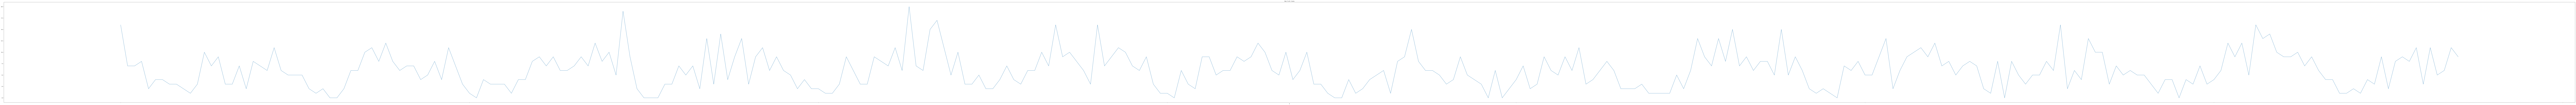

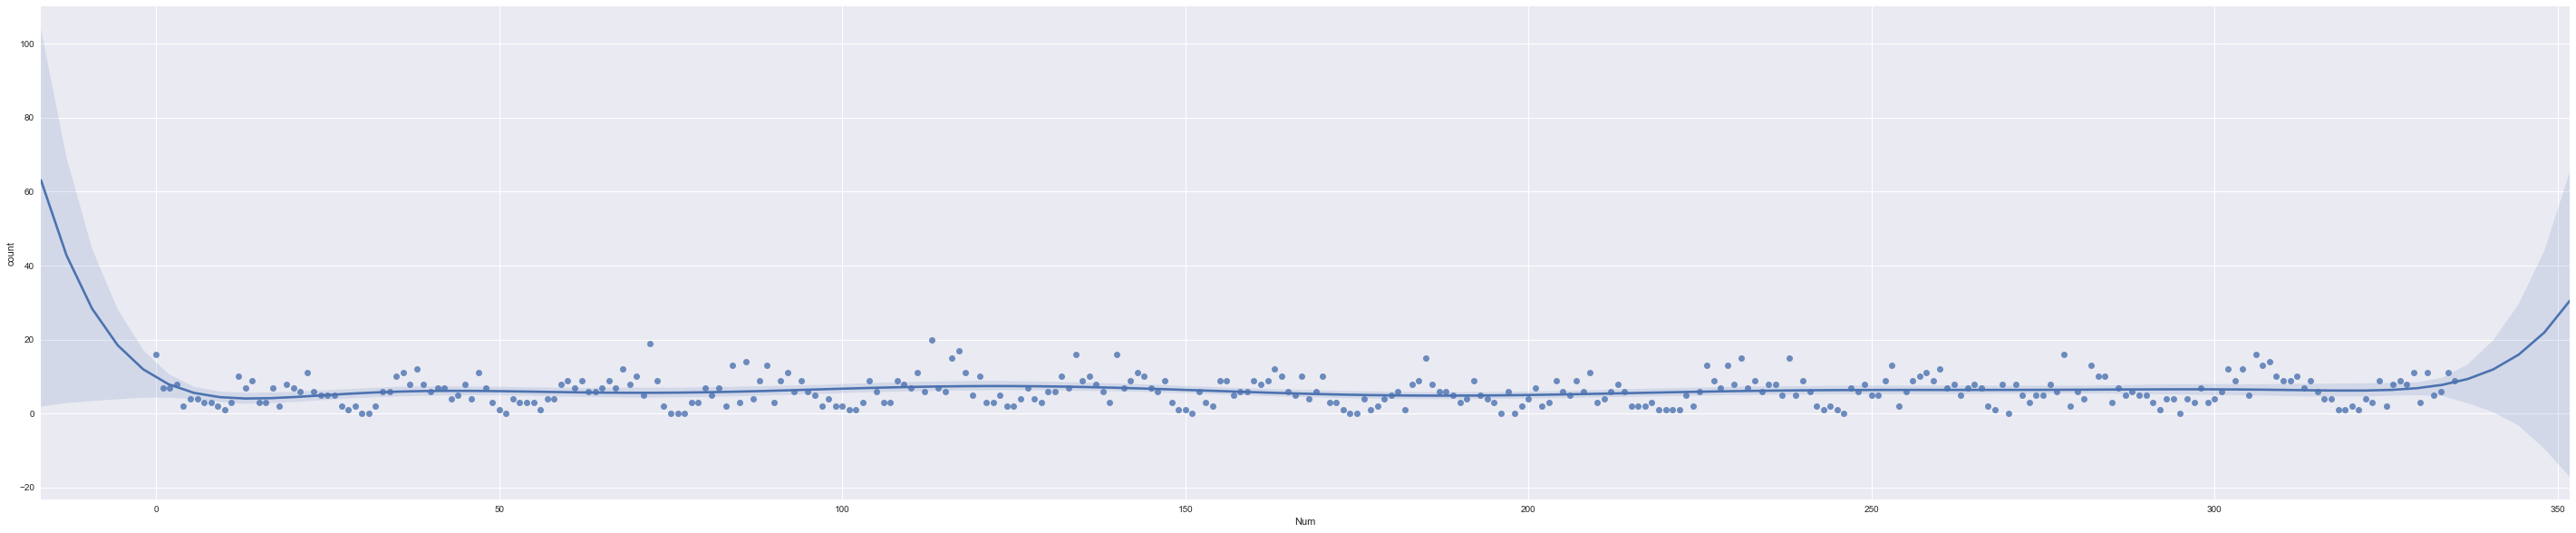

In [19]:
hourbyhour = pd.DataFrame({'dt': dateandtime,'count':ugh })
#hourbyhour = hourbyhour.sort_values('dt')
#hourbar = hourbar.drop([24],axis = 0)
ax = hourbyhour.plot(x = 'dt', y = 'count', kind = 'line', figsize = (500,20),title = 'May 7 to 20 - Hourly', legend = False, fontsize = 12)
fig = ax.get_figure()
fig.savefig("output.png")
import seaborn as sns; sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(50,10))
hourbyhour["Num"] = [i for i in range(0,336)]
ax = sns.regplot(x = "Num" ,y="count", data=hourbyhour,order = 10)

# Hourly by day followed by avg and std

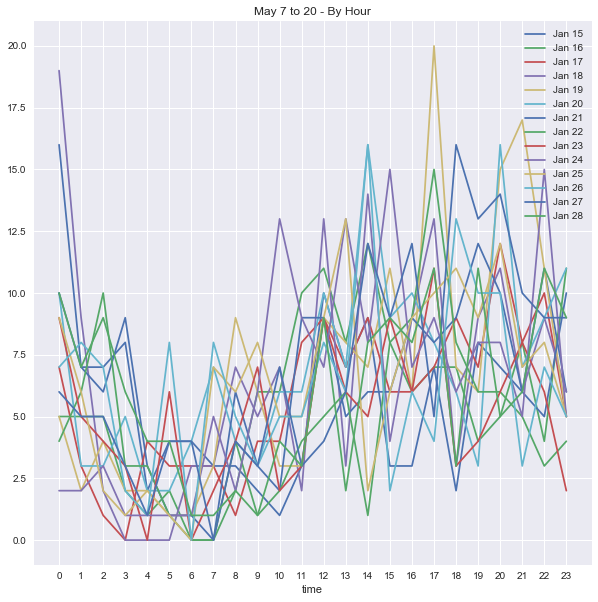

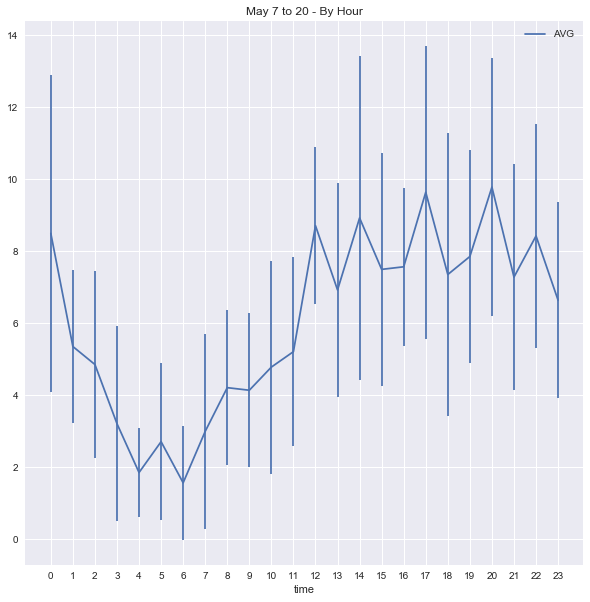

In [20]:
hour = pd.DataFrame({"time" :[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],"Jan 15": ugh[0:24],
                     "Jan 16": ugh[24:48] ,
                     "Jan 17": ugh[48:72], 
                     "Jan 18": ugh[72:96],
                     "Jan 19": ugh[96:120],
                     "Jan 20": ugh[120:144],
                     "Jan 21": ugh[144:168],
                     "Jan 22": ugh[168:192],
                     "Jan 23": ugh[192:216], 
                     "Jan 24": ugh[216:240],
                     "Jan 25": ugh[240:264],
                     "Jan 26": ugh[264:288],
                     "Jan 27": ugh[288:312],
                     "Jan 28": ugh[312:336]})
ax = hour.plot(x = "time", xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], kind = "line", figsize = (10,10), title = 'May 7 to 20 - By Hour', legend = True)
ughh = []
ughh.append(np.mean(time_0))
ughh.append(np.mean(time_1))
ughh.append(np.mean(time_2))
ughh.append(np.mean(time_3))
ughh.append(np.mean(time_4))
ughh.append(np.mean(time_5))
ughh.append(np.mean(time_6))
ughh.append(np.mean(time_7))
ughh.append(np.mean(time_8))
ughh.append(np.mean(time_9))
ughh.append(np.mean(time_10))
ughh.append(np.mean(time_11))
ughh.append(np.mean(time_12))
ughh.append(np.mean(time_13))
ughh.append(np.mean(time_14))
ughh.append(np.mean(time_15))
ughh.append(np.mean(time_16))
ughh.append(np.mean(time_17))
ughh.append(np.mean(time_18))
ughh.append(np.mean(time_19))
ughh.append(np.mean(time_20))
ughh.append(np.mean(time_21))
ughh.append(np.mean(time_22))
ughh.append(np.mean(time_23))
hour["AVG"] = ughh

ughh = []
ughh.append(np.std(time_0))
ughh.append(np.std(time_1))
ughh.append(np.std(time_2))
ughh.append(np.std(time_3))
ughh.append(np.std(time_4))
ughh.append(np.std(time_5))
ughh.append(np.std(time_6))
ughh.append(np.std(time_7))
ughh.append(np.std(time_8))
ughh.append(np.std(time_9))
ughh.append(np.std(time_10))
ughh.append(np.std(time_11))
ughh.append(np.std(time_12))
ughh.append(np.std(time_13))
ughh.append(np.std(time_14))
ughh.append(np.std(time_15))
ughh.append(np.std(time_16))
ughh.append(np.std(time_17))
ughh.append(np.std(time_18))
ughh.append(np.std(time_19))
ughh.append(np.std(time_20))
ughh.append(np.std(time_21))
ughh.append(np.std(time_22))
ughh.append(np.std(time_23))
hour["STD"] = ughh

ax = hour.plot(x = "time", xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], y = "AVG", yerr = "STD", kind = "line", figsize = (10,10), title = 'May 7 to 20 - By Hour', legend = True)

[[1, 0.18706871511671877, 0.3286072601169887, 0.6669162532568128, 0.2089055055101102, 0.39770785163157185, 0.4615718909653857, 1], [0.18706871511671877, 1, 0.5542198230223435, 0.37532678828379157, 0.35695800322811827, 0.5563380336355424, 0.47062919382376134, 1], [0.3286072601169887, 0.5542198230223435, 1, 0.5175697250016935, 0.5832005892325955, 0.6826657209827294, 0.42321665027676386, 1], [0.6669162532568128, 0.37532678828379157, 0.5175697250016935, 1, 0.44076960760474243, 0.6154139308244924, 0.4578382382574878, 1], [0.2089055055101102, 0.35695800322811827, 0.5832005892325955, 0.44076960760474243, 1, 0.4715007987759131, 0.31524787361138534, 1], [0.39770785163157185, 0.5563380336355424, 0.6826657209827294, 0.6154139308244924, 0.4715007987759131, 1, 0.37900921871629273, 1], [0.4615718909653857, 0.47062919382376134, 0.42321665027676386, 0.4578382382574878, 0.31524787361138534, 0.37900921871629273, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]
Jan 15-21


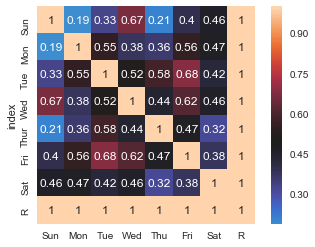

In [21]:
x = pd.DataFrame({"time": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
x = x.set_index("time")
x["Mon"] =  hour["Jan 16"]
x["Tue"] =  hour["Jan 17"]
x["Wed"] =  hour["Jan 18"]
x["Thu"] =  hour["Jan 19"]
x["Fri"] =  hour["Jan 20"]
x["Sat"] =  hour["Jan 21"]
x["Sun"] =  hour["Jan 15"]
r = [[1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,0,1],
    [0,0,1,0,0,0,0,1],
    [0,0,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,1],
    [1,1,1,1,1,1,1,1]]
#Sun - Mon
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Mon'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][1] = r[1][0] = r_value
#sns.lmplot(x="Sun", y="Mon", data=x)
#ax = hour.plot(y = ["March 12", "March 13"])
#Sun - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][2] = r[2][0] = r_value
#sns.lmplot(x="Sun", y="Tue", data=x)
#ax = hour.plot(y = ["March 12", "March 14"])
#Sun - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][3] = r[3][0] = r_value
#sns.lmplot(x="Sun", y="Wed", data=x)
#ax = hour.plot(y = ["March 12", "March 15"])
#Sun - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][4] = r[4][0] = r_value
#sns.lmplot(x="Sun", y="Thu", data=x)
#ax = hour.plot(y = ["March 12", "March 16"])
#Sun - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][5] = r[5][0] = r_value
#sns.lmplot(x="Sun", y="Fri", data=x)
#ax = hour.plot(y = ["March 12", "March 17"])
#Sun - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][6] = r[6][0] = r_value
#sns.lmplot(x="Sun", y="Sat", data=x)
#ax = hour.plot(y = ["March 12", "March 1"])

#Mon - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][2] = r[2][1] = r_value
#sns.lmplot(x="Mon", y="Tue", data=x)
#Mon - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][3] = r[3][1] = r_value
#sns.lmplot(x="Mon", y="Wed", data=x)
#Mon - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][4] = r[4][1] = r_value
#sns.lmplot(x="Mon", y="Thu", data=x)
#Mon - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][5] = r[5][1] = r_value
#sns.lmplot(x="Mon", y="Fri", data=x)
#Mon - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][6] = r[6][1] = r_value
#sns.lmplot(x="Mon", y="Sat", data=x)

#Tue - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][3] = r[3][2] = r_value
#sns.lmplot(x="Tue", y="Wed", data=x)
#Tue - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][4] = r[4][2] = r_value
#sns.lmplot(x="Tue", y="Thu", data=x)
#Tue - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][5] = r[5][2] = r_value
#sns.lmplot(x="Tue", y="Fri", data=x)
#Tue - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][6] = r[6][2] = r_value
#sns.lmplot(x="Tue", y="Sat", data=x)

#Wed - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][4] = r[4][3] = r_value
#sns.lmplot(x="Wed", y="Thu", data=x)
#Wed - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][5] = r[5][3] = r_value
#sns.lmplot(x="Wed", y="Fri", data=x)
#Wed - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][6] = r[6][3] = r_value
#sns.lmplot(x="Wed", y="Sat", data=x)

#Thu - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][5] = r[5][4] = r_value
#sns.lmplot(x="Thu", y="Fri", data=x)
#Thu - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][6] = r[6][4] = r_value
#sns.lmplot(x="Thu", y="Sat", data=x)

#Fri - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Fri'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[5][6] = r[6][5] = r_value
#sns.lmplot(x="Fri", y="Sat", data=x)

print(r)
heat = pd.DataFrame({"index": ["Sun","Mon","Tue","Wed","Thur","Fri","Sat","R"], "Sun":r[0]
                    , "Mon":r[1]
                    , "Tue":r[2]
                    , "Wed":r[3]
                    , "Thu":r[4]
                    , "Fri":r[5]
                    , "Sat":r[6]
                    , "R":r[7]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
#f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(10,10))

print('Jan 15-21')
ax = sns.heatmap(heat, square = True, center = .5,annot = True) #ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"},

[[1, 0.4980166486375951, 0.23493830544132152, 0.45528015533176563, 0.03407984603888354, 0.3242628489855122, 0.5157581213881318, 1], [0.4980166486375951, 1, 0.32853871226986436, 0.5092445407847398, 0.09260658411782884, 0.1682909179129181, 0.49879454356377123, 1], [0.23493830544132152, 0.32853871226986436, 1, 0.4884271736199628, 0.13051818806608073, 0.37397596763833424, 0.24794745359272735, 1], [0.45528015533176563, 0.5092445407847398, 0.4884271736199628, 1, 0.28911174405281603, 0.4287797318929102, 0.13131486059907202, 1], [0.03407984603888354, 0.09260658411782884, 0.13051818806608073, 0.28911174405281603, 1, 0.5554878046285104, 0.20327822649695654, 1], [0.3242628489855122, 0.1682909179129181, 0.37397596763833424, 0.4287797318929102, 0.5554878046285104, 1, 0.36286922471600364, 1], [0.5157581213881318, 0.49879454356377123, 0.24794745359272735, 0.13131486059907202, 0.20327822649695654, 0.36286922471600364, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]
Jan 22-28


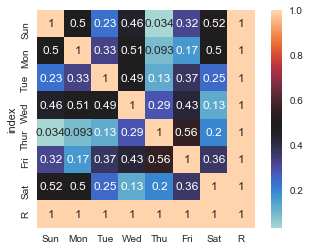

In [22]:
x = pd.DataFrame({"time": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
x = x.set_index("time")
x["Mon"] =  hour["Jan 23"]
x["Tue"] =  hour["Jan 24"]
x["Wed"] =  hour["Jan 25"]
x["Thu"] =  hour["Jan 26"]
x["Fri"] =  hour["Jan 27"]
x["Sat"] =  hour["Jan 28"]
x["Sun"] =  hour["Jan 22"]
r = [[1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,0,1],
    [0,0,1,0,0,0,0,1],
    [0,0,0,1,0,0,0,1],
    [0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,1],
    [1,1,1,1,1,1,1,1]]
#Sun - Mon
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Mon'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][1] = r[1][0] = r_value
#sns.lmplot(x="Sun", y="Mon", data=x)
#ax = hour.plot(y = ["March 12", "March 13"])
#Sun - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][2] = r[2][0] = r_value
#sns.lmplot(x="Sun", y="Tue", data=x)
#ax = hour.plot(y = ["March 12", "March 14"])
#Sun - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][3] = r[3][0] = r_value
#sns.lmplot(x="Sun", y="Wed", data=x)
#ax = hour.plot(y = ["March 12", "March 15"])
#Sun - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][4] = r[4][0] = r_value
#sns.lmplot(x="Sun", y="Thu", data=x)
#ax = hour.plot(y = ["March 12", "March 16"])
#Sun - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][5] = r[5][0] = r_value
#sns.lmplot(x="Sun", y="Fri", data=x)
#ax = hour.plot(y = ["March 12", "March 17"])
#Sun - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Sun'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[0][6] = r[6][0] = r_value
#sns.lmplot(x="Sun", y="Sat", data=x)
#ax = hour.plot(y = ["March 12", "March 1"])

#Mon - Tue
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Tue'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][2] = r[2][1] = r_value
#sns.lmplot(x="Mon", y="Tue", data=x)
#Mon - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][3] = r[3][1] = r_value
#sns.lmplot(x="Mon", y="Wed", data=x)
#Mon - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][4] = r[4][1] = r_value
#sns.lmplot(x="Mon", y="Thu", data=x)
#Mon - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][5] = r[5][1] = r_value
#sns.lmplot(x="Mon", y="Fri", data=x)
#Mon - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Mon'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[1][6] = r[6][1] = r_value
#sns.lmplot(x="Mon", y="Sat", data=x)

#Tue - Wed
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Wed'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][3] = r[3][2] = r_value
#sns.lmplot(x="Tue", y="Wed", data=x)
#Tue - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][4] = r[4][2] = r_value
#sns.lmplot(x="Tue", y="Thu", data=x)
#Tue - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][5] = r[5][2] = r_value
#sns.lmplot(x="Tue", y="Fri", data=x)
#Tue - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Tue'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[2][6] = r[6][2] = r_value
#sns.lmplot(x="Tue", y="Sat", data=x)

#Wed - Thu
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Thu'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][4] = r[4][3] = r_value
#sns.lmplot(x="Wed", y="Thu", data=x)
#Wed - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][5] = r[5][3] = r_value
#sns.lmplot(x="Wed", y="Fri", data=x)
#Wed - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Wed'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[3][6] = r[6][3] = r_value
#sns.lmplot(x="Wed", y="Sat", data=x)

#Thu - Fri
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Fri'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][5] = r[5][4] = r_value
#sns.lmplot(x="Thu", y="Fri", data=x)
#Thu - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Thu'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[4][6] = r[6][4] = r_value
#sns.lmplot(x="Thu", y="Sat", data=x)

#Fri - Sat
m, b, r_value, p_value, std_err = stats.linregress(x['Fri'],x['Sat'])
#print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
r[5][6] = r[6][5] = r_value
#sns.lmplot(x="Fri", y="Sat", data=x)

print(r)
heat = pd.DataFrame({"index": ["Sun","Mon","Tue","Wed","Thur","Fri","Sat","R"], "Sun":r[0]
                    , "Mon":r[1]
                    , "Tue":r[2]
                    , "Wed":r[3]
                    , "Thu":r[4]
                    , "Fri":r[5]
                    , "Sat":r[6]
                    , "R":r[7]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
#f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(10,10))

print('Jan 22-28')
ax = sns.heatmap(heat, square = True, center = .5,annot = True) #ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"},

In [32]:
def optimal_lag(list1, list2):
    x = list(list1)
    y = list(list2)
    #/* Calculate the mean of the two series x[], y[] */
    mx = np.mean(x)
    my = np.mean(y)

    n = 23
    #/* Calculate the denominator */
    sx = 0;
    sy = 0;
    for i in range (0,n):
        sx += (x[i] - mx) * (x[i] - mx)
        sy += (y[i] - my) * (y[i] - my)
    denom = np.sqrt(sx*sy);

    #/* Calculate the correlation series */
    maxdelay = 6
    r = []
    index = []
    for delay in range (-maxdelay,maxdelay):
        sxy = 0;
        for i in range (0,n):
            j = i + delay
            if (j < 0 or j >= n) == False:
                sxy += (x[i] - mx) * (y[j] - my)
            #Or should it be (?)
            #if (j < 0 || j >= n)
                #sxy += (x[i] - mx) * (-my);
            #else
                #sxy += (x[i] - mx) * (y[j] - my);
        index.append(delay)
        r.append(sxy / denom)
        #/* r is the correlation coefficient at "delay" */
    mx = max(r)
#     mn = min(r)
#     if abs(mn) > abs (mx):
#         return(index[r.index(mn)], mn)
#     else:
#         return(index[r.index(mx)], mx)
    return(index[r.index(mx)], mx)

In [33]:
lag = [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,-6],
    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,-5],
    [0,0,1,0,0,0,0,0,1,0,0,0,0,0,-4],
    [0,0,0,1,0,0,0,0,1,0,0,0,0,0,-3],
    [0,0,0,0,1,0,0,0,1,0,0,0,0,0,-2],
    [0,0,0,0,0,1,0,0,1,0,0,0,0,0,-1],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,1],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,2],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,3],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,4],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,5],
    [-6,-5,-4,-3,-2,-1,0,0,0,1,2,3,4,5,6]]

r = [[1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,13/14],
    [0,0,1,0,0,0,0,0,1,0,0,0,0,0,12/14],
    [0,0,0,1,0,0,0,0,1,0,0,0,0,0,11/14],
    [0,0,0,0,1,0,0,0,1,0,0,0,0,0,10/14],
    [0,0,0,0,0,1,0,0,1,0,0,0,0,0,9/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,8/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,7/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,6/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,5/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,4/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,3/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,2/14],
    [0,0,0,0,0,0,1,0,1,0,0,0,0,0,1/14],
    [1,13/14,12/14,11/14,10/14,9/14,8/14,7/14,6/14,5/14,4/14,3/14,2/14,1/14,0]]

days = ["Jan 15","Jan 16","Jan 17","Jan 18","Jan 19","Jan 20","Jan 21","Jan 22","Jan 23","Jan 24","Jan 25","Jan 26","Jan 27","Jan 28"]
for d in days:
    for d2 in days:
        i,m = optimal_lag(hour[d],hour[d2])
        lag[days.index(d)][days.index(d2)] = i
        r[days.index(d)][days.index(d2)] = m


May 7-20
Jan 15-28 NEG R NOT ALLOWED


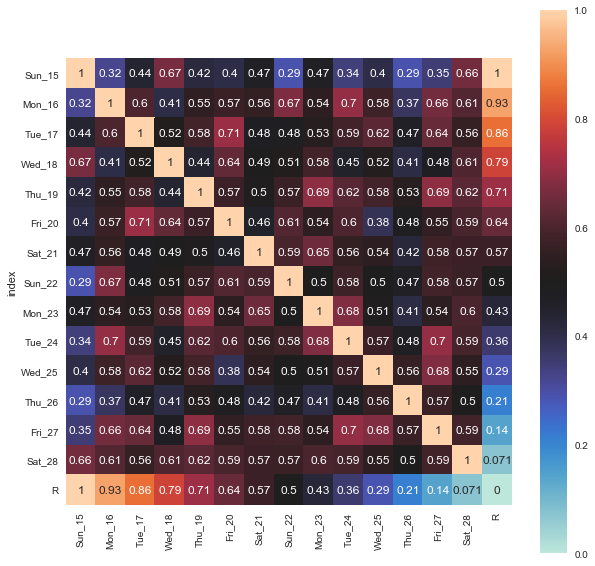

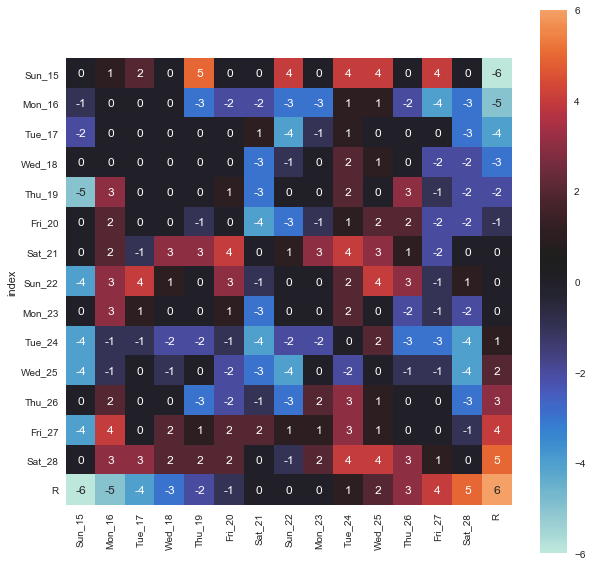

In [34]:
heat = pd.DataFrame({"index": ["Sun_15","Mon_16","Tue_17","Wed_18","Thu_19","Fri_20","Sat_21","Sun_22","Mon_23","Tue_24","Wed_25","Thu_26","Fri_27","Sat_28","R"], 
                     "Sun_15":r[0]
                    , "Mon_16":r[1]
                    , "Tue_17":r[2]
                    , "Wed_18":r[3]
                    , "Thu_19":r[4]
                    , "Fri_20":r[5]
                    , "Sat_21":r[6]
                    ,"Sun_22":r[7]
                    , "Mon_23":r[8]
                    , "Tue_24":r[9]
                    , "Wed_25":r[10]
                    , "Thu_26":r[11]
                    , "Fri_27":r[12]
                    , "Sat_28":r[13]
                    , "R":r[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('May 7-20')
ax = sns.heatmap(heat, square = True, center = .5,annot = True)

heat = pd.DataFrame({"index": ["Sun_15","Mon_16","Tue_17","Wed_18","Thu_19","Fri_20","Sat_21","Sun_22","Mon_23","Tue_24","Wed_25","Thu_26","Fri_27","Sat_28","R"], 
                     "Sun_15":lag[0]
                    , "Mon_16":lag[1]
                    , "Tue_17":lag[2]
                    , "Wed_18":lag[3]
                    , "Thu_19":lag[4]
                    , "Fri_20":lag[5]
                    , "Sat_21":lag[6]
                    ,"Sun_22":lag[7]
                    , "Mon_23":lag[8]
                    , "Tue_24":lag[9]
                    , "Wed_25":lag[10]
                    , "Thu_26":lag[11]
                    , "Fri_27":lag[12]
                    , "Sat_28":lag[13]
                    , "R":lag[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('Jan 15-28 NEG R NOT ALLOWED')
ax = sns.heatmap(heat, square = True, center = .5,annot = True)

May 7-20
Jan 15-28 NEG R ALLOWED


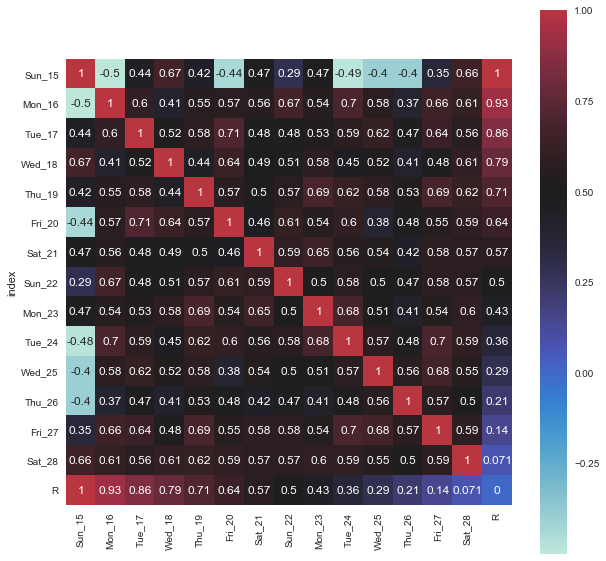

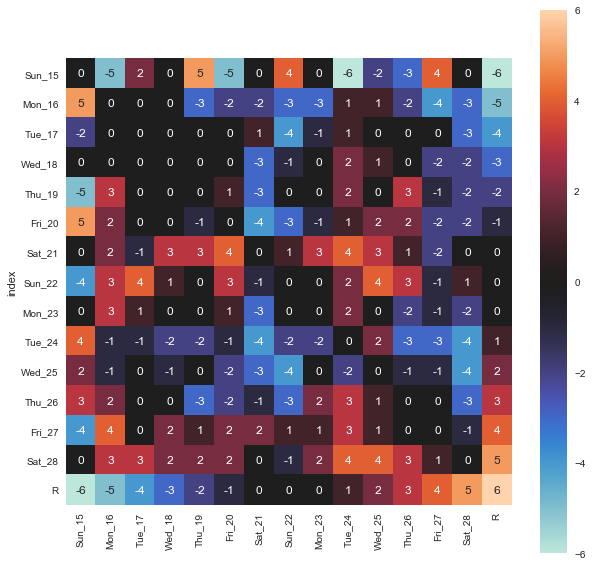

In [31]:
heat = pd.DataFrame({"index": ["Sun_15","Mon_16","Tue_17","Wed_18","Thu_19","Fri_20","Sat_21","Sun_22","Mon_23","Tue_24","Wed_25","Thu_26","Fri_27","Sat_28","R"], 
                     "Sun_15":r[0]
                    , "Mon_16":r[1]
                    , "Tue_17":r[2]
                    , "Wed_18":r[3]
                    , "Thu_19":r[4]
                    , "Fri_20":r[5]
                    , "Sat_21":r[6]
                    ,"Sun_22":r[7]
                    , "Mon_23":r[8]
                    , "Tue_24":r[9]
                    , "Wed_25":r[10]
                    , "Thu_26":r[11]
                    , "Fri_27":r[12]
                    , "Sat_28":r[13]
                    , "R":r[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('May 7-20')
ax = sns.heatmap(heat, square = True, center = .5,annot = True)

heat = pd.DataFrame({"index": ["Sun_15","Mon_16","Tue_17","Wed_18","Thu_19","Fri_20","Sat_21","Sun_22","Mon_23","Tue_24","Wed_25","Thu_26","Fri_27","Sat_28","R"], 
                     "Sun_15":lag[0]
                    , "Mon_16":lag[1]
                    , "Tue_17":lag[2]
                    , "Wed_18":lag[3]
                    , "Thu_19":lag[4]
                    , "Fri_20":lag[5]
                    , "Sat_21":lag[6]
                    ,"Sun_22":lag[7]
                    , "Mon_23":lag[8]
                    , "Tue_24":lag[9]
                    , "Wed_25":lag[10]
                    , "Thu_26":lag[11]
                    , "Fri_27":lag[12]
                    , "Sat_28":lag[13]
                    , "R":lag[14]})
heat = heat.set_index('index')
#grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, ax = plt.subplots(figsize=(10,10))

print('Jan 15-28 NEG R ALLOWED')
ax = sns.heatmap(heat, square = True, center = 0,annot = True)